In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib import animation

import Emma3 as EH

In [2]:
#EH.sterile_production(1000, 0.0071, 1e-10, 1e-10, 1e-10, 7.6e-4, 7.6e-4, 7.6e-4, make_plot=True, folder_name="Neutrino Data")

In [3]:
data_file = np.load("3to1 model/sharprestestx5.e-04x3.e-10.npz")

In [4]:
data_file.files

['T',
 'final_distribution',
 'epsilon',
 'lep_evo_e',
 'lep_evo_mu',
 'lep_evo_tau',
 'a',
 't',
 'sterile_evo',
 'anti_sterile_evo',
 'mass_s',
 'mixangv_tot',
 'Le0',
 'Lmu0',
 'Ltau0',
 'mixangv_e',
 'mixangv_mu',
 'mixangv_tau',
 'omega_h2']

In [5]:
data_file['T'].shape

(247,)

In [6]:
def st_plot(i, data):
    eps_array = data['epsilon']
    N = len(eps_array)
    f_e_matrix = data['sterile_evo']
    temperature = data['T']
    Le = data['lep_evo_e']
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    ax[0].plot(eps_array, eps_array**2 * f_e_matrix[i,:N])
    ax[1].semilogx(temperature[:i], Le[:i])
    
    ax[1].set_xlim([2000,10])
    ax[1].set_ylim([-0.00002,Le[0]*1.1])
    ax[0].set_ylim([-0.0001, 1.1*np.max(eps_array**2 * f_e_matrix[-1,:])])

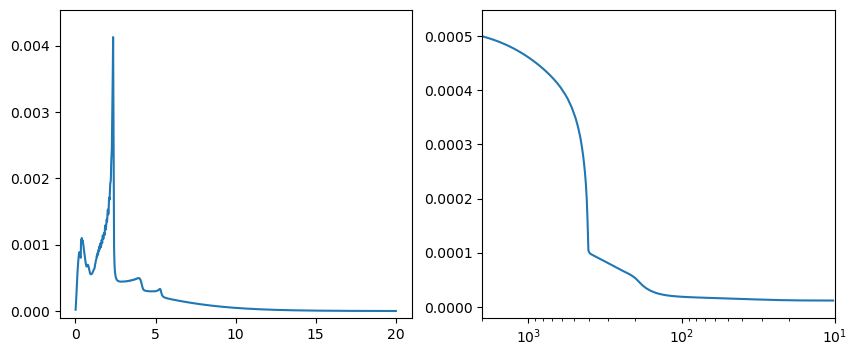

In [7]:
st_plot(-1, data_file)

In [8]:
widgets.interact(st_plot, i=(0,len(data_file['T']),10), data=widgets.fixed(data_file))

interactive(children=(IntSlider(value=120, description='i', max=247, step=10), Output()), _dom_classes=('widge…

<function __main__.st_plot(i, data)>

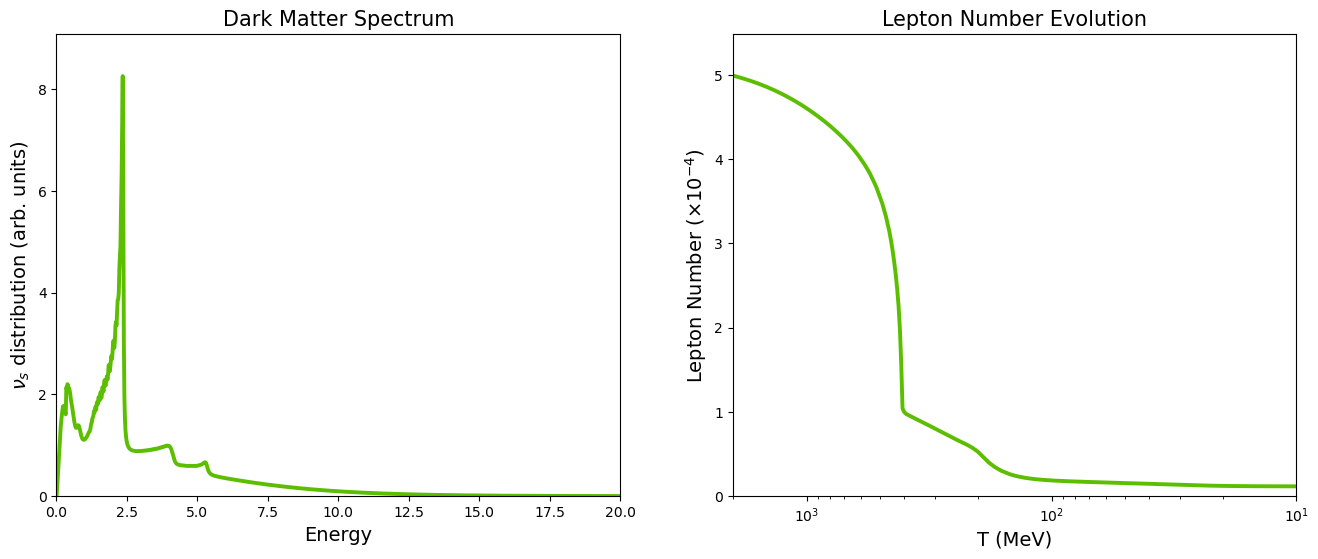

In [10]:
i=10
eps_array = data_file['epsilon']
N = len(eps_array)
f_e_matrix = data_file['sterile_evo']*2000
temperature = data_file['T']
Le = data_file['lep_evo_e']*10**4
fig, ax = plt.subplots(1,2,figsize=(16,6))

spec, = ax[0].plot([], [], color='#5CBE00', linewidth=2.8)
lepnum, = ax[1].semilogx([], [], color='#5CBE00', linewidth=2.8)
ax[0].set_xlim([0,20])
ax[0].set_ylim([-0.0001, 1.1*np.max(eps_array**2 * f_e_matrix[-1,:])])
ax[0].set_xlabel('Energy', fontsize=14)
ax[0].set_ylabel(r"$\nu_s$ distribution (arb. units)", fontsize=14)
ax[0].set_title('Dark Matter Spectrum', fontsize=15)

ax[1].set_xlim([2000,10])
ax[1].set_ylim([-0.00002,Le[0]*1.1])
ax[1].set_xlabel("T (MeV)", fontsize=14)
ax[1].set_ylabel(r"Lepton Number $(\times 10^{-4})}$", fontsize=14)
ax[1].set_title('Lepton Number Evolution', fontsize=15)



def init():
    spec.set_data([], [])
    lepnum.set_data([], [])
    return spec, lepnum

def animate(i):
    spec.set_data(eps_array, eps_array**2 * f_e_matrix[i,:N])
    lepnum.set_data(temperature[:i], Le[:i])
    return spec, lepnum

anim = animation.FuncAnimation(fig, animate, init_func = init, frames = len(temperature), interval = 1, blit=True)

#anim.save("st_ev.mp4")
anim.save("st_ev3.gif", writer='pillow')
